In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


               Country  Birth Rate  ...  Stroke Rate  Life Expectancy
0          afghanistan        45.1  ...       154.41            59.82
1              albania        11.5  ...       105.31            77.49
2              algeria        24.8  ...        74.66            74.42
3       american samoa        23.5  ...        83.21            73.19
4              andorra        10.2  ...        83.21            73.19
5               angola        40.9  ...       142.27            51.68
6        anguilla (uk)        11.1  ...        83.21            73.19
7  antigua and barbuda        13.8  ...        47.90            75.82
8        arab emirates        17.5  ...        78.00            73.19
9            argentina        18.7  ...        44.13            76.01

[10 rows x 13 columns]
(248,)
(248, 11)


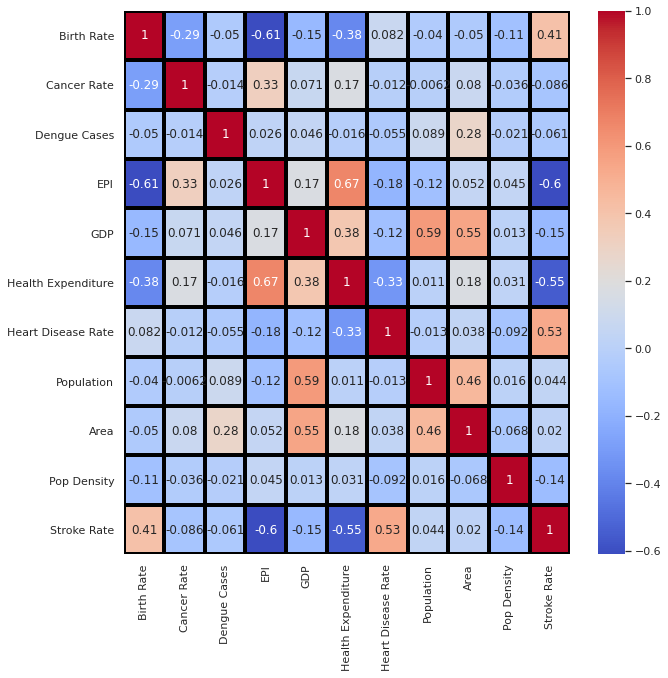

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=pd.read_csv("df3.csv")
print(data.head(10))
Y=data.iloc[:,12].to_numpy()
X=data.iloc[:,1:12].to_numpy()
X=scaler.fit_transform(X)
print(np.shape(Y))
print(np.shape(X))
Var=data.iloc[:,1:12].corr(method='pearson')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
import seaborn as sns
sns.set_theme()
sns.heatmap(Var,annot=True,fmt='.2g',cmap= 'coolwarm', linewidths=3, linecolor='black',ax=ax)
ax.set_xticklabels(Var.columns)
ax.set_yticklabels(Var.columns)
plt.show()

In [ ]:
data.head(5)

,Country,Birth Rate,Cancer Rate,Dengue Cases,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
0,afghanistan,45.1,118.50,10230,37.74,19585.0,46,263.34,24485600.0,652864.0,37.50,154.41,59.82
1,albania,11.5,126.75,10230,65.46,15202.0,204,126.59,3195000.0,28748.0,111.10,105.31,77.49
2,algeria,24.8,74.01,10230,57.18,180441.0,228,110.05,35978000.0,2381741.0,15.10,74.66,74.42
3,american samoa,23.5,109.11,10230,56.18,41325.5,300,116.09,10526956.5,240302.5,74.75,83.21,73.19
4,andorra,10.2,109.11,10230,56.18,41325.5,4596,116.09,10526956.5,240302.5,74.75,83.21,73.19


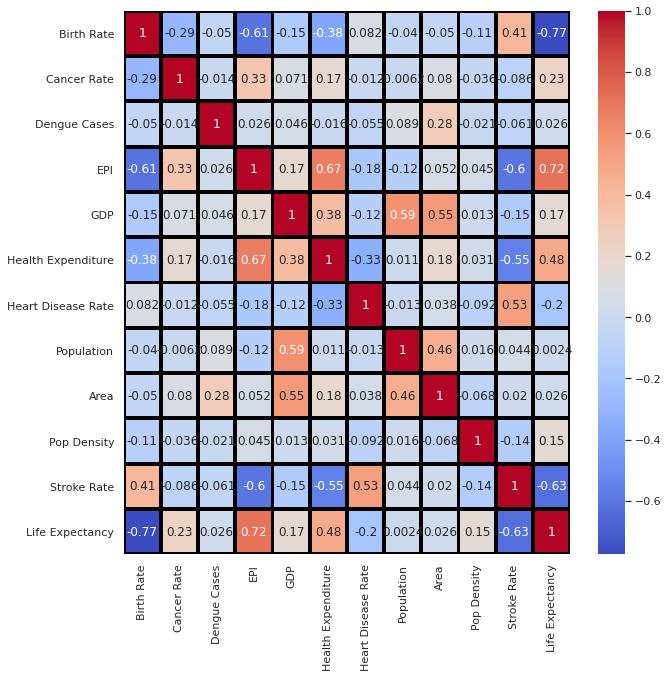

In [ ]:
#Y vs All independent variables
V=data.iloc[:,1:13].corr(method='pearson')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
import seaborn as sns
sns.set_theme()
sns.heatmap(V,annot=True,fmt='.2g',cmap= 'coolwarm', linewidths=3, linecolor='black',ax=ax)
ax.set_xticklabels(V.columns)
ax.set_yticklabels(V.columns)
plt.show()

In [ ]:
data.drop(data.columns[[0]],axis=1,inplace=True)
print(data.head(10))

   Birth Rate  Cancer Rate  ...  Stroke Rate  Life Expectancy
0        45.1       118.50  ...       154.41            59.82
1        11.5       126.75  ...       105.31            77.49
2        24.8        74.01  ...        74.66            74.42
3        23.5       109.11  ...        83.21            73.19
4        10.2       109.11  ...        83.21            73.19
5        40.9        82.46  ...       142.27            51.68
6        11.1       109.11  ...        83.21            73.19
7        13.8       119.09  ...        47.90            75.82
8        17.5        46.07  ...        78.00            73.19
9        18.7       134.15  ...        44.13            76.01

[10 rows x 12 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# split into train test sets
X=data.iloc[:,0:11].to_numpy()
y=data.iloc[:,11].to_numpy()
X=scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(186, 11) (62, 11) (186,) (62,)


In [ ]:
#Y_train
Z=np.empty((0,1))
Z.shape

(0, 1)

In [ ]:
X_train_mean=np.empty((0,1))
X_trainT=np.transpose(X_train)
for i in X_trainT:
    m=np.mean(i)
    # print(m)
    X_train_mean=np.append(X_train_mean,[[m]],axis=0)
X_train_mean
#X_test_mean=np.empty((0,1))
#X_testT=np.transpose(X_test)
#for j in X_testT:
#    m=np.mean(j)
    #print(m)
#    X_test_mean=np.append(X_test_mean,[[m]],axis=0)    
Y_train_mean=np.mean(Y_train)
Y_train=Y_train-Y_train_mean
#Y_test_mean=np.mean(Y_test)
#Y_test=Y_test-Y_test_mean
print(np.shape(X_train))
print(np.shape(X_trainT))
print(np.shape(X_train_mean))
print(np.shape(Y_train_mean))
print(np.shape(Y_train))   

(186, 11)
(11, 186)
(11, 1)
()
(186,)


In [ ]:
validation=np.dot(X_train,X_trainT)
print(np.linalg.det(validation))

-0.0


In [ ]:
Y_train_mean

71.96166666666666

In [ ]:
X_trainT=X_trainT-X_train_mean
X_train=X_train-np.transpose(X_train_mean)
numerator=np.dot(np.transpose(X_train),Y_train)
print(numerator)

[-2.73199786e+02  4.62866132e+01  2.56109015e-01  1.70236100e+02
  2.09366095e+01  1.21996239e+02 -3.63282644e+01  8.92863178e-01
  5.24979326e-01  7.83567080e+00 -1.65672122e+02]


In [ ]:
denominator=np.dot(np.transpose(X_train),X_train)
inverse=np.linalg.inv(denominator)
print(np.shape(numerator))
print(np.shape(inverse))
w=np.dot(inverse,numerator)
print(w)
LS_w=list(w)

(11,)
(11, 11)
[-15.71670175  -1.45960905  -3.44560863  10.32323224   0.96748213
  -1.11093597   1.17442801   1.82382725  -0.54057311  14.24093155
  -8.63178432]


In [ ]:
denominator
#LS_w
#print(np.linalg.det(denominator))

array([[ 1.22429802e+01, -1.72148268e+00, -1.77254263e-01,
        -5.29541128e+00, -7.01642952e-01, -3.51611655e+00,
         3.02688753e-01, -2.88549962e-01, -3.41627682e-01,
        -4.88602520e-01,  3.84456217e+00],
       [-1.72148268e+00,  5.64024435e+00, -4.46343416e-02,
         1.74573630e+00,  2.21115624e-01,  9.74556229e-01,
        -1.02722595e-03,  3.18276543e-03,  3.75467622e-01,
        -1.27155693e-01, -2.34815412e-01],
       [-1.77254263e-01, -4.46343416e-02,  1.01607592e+00,
         7.75100786e-02,  5.35557225e-02, -5.17590140e-02,
        -1.10811015e-01,  1.17921077e-01,  4.43207659e-01,
        -2.73386335e-02, -1.87116644e-01],
       [-5.29541128e+00,  1.74573630e+00,  7.75100786e-02,
         6.28470999e+00,  5.28109452e-01,  4.47029876e+00,
        -8.68993303e-01, -4.30721635e-01,  1.62997521e-01,
         1.13731806e-01, -4.46445578e+00],
       [-7.01642952e-01,  2.21115624e-01,  5.35557225e-02,
         5.28109452e-01,  1.55124283e+00,  1.25166111e+00,
  

In [ ]:
w*denominator*w*sigma**2

array([[ 1.62278147e+05, -6.82898020e+01, -1.06292414e+02,
        -3.57182587e+04, -7.83086498e-01, -1.26090997e+03,
         1.71536526e-01, -1.19324406e+02, -4.67756433e+00,
        -4.63818009e+02,  1.77553450e+04],
       [-2.28178936e+04,  2.23743854e+02, -2.67654600e+01,
         1.17752253e+04,  2.46781727e-01,  3.49484337e+02,
        -5.82138477e-04,  1.31617274e+00,  5.14090060e+00,
        -1.20705682e+02, -1.08444823e+03],
       [-2.34946826e+03, -1.77060762e+00,  6.09300786e+02,
         5.22815868e+02,  5.97722289e-02, -1.85612325e+01,
        -6.27976305e-02,  4.87640420e+01,  6.06839681e+00,
        -2.59518730e+01, -8.64160969e+02],
       [-7.01895712e+04,  6.92519229e+01,  4.64797472e+01,
         4.23912111e+04,  5.89410013e-01,  1.60308800e+03,
        -4.92466570e-01, -1.78116826e+02,  2.23176116e+00,
         1.07962725e+02, -2.06182002e+04],
       [-9.30013088e+03,  8.77147491e+00,  3.21152615e+01,
         3.56216903e+03,  1.73130409e+00,  4.48856557e+02,
  

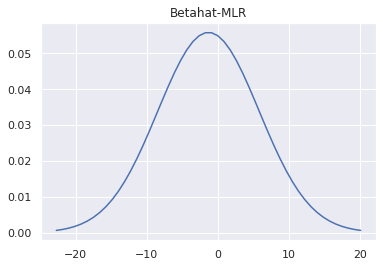

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 
import scipy.stats as stats
import math
mu = np.mean(w)
variance = statistics.variance(w)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Betahat-MLR')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# from scipy.stats import multivariate_normal
# mu = np.mean(w)
# variance = statistics.variance(w)
# sigma = math.sqrt(variance)
# # x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)

# # x, y = np.mgrid[-1:1:.01, -1:1:.01]
# x=[1,2,3]
# y=[3,4,5]
# z=[7,8,9]

# pos = np.dstack((x, y ,z))

# rv = multivariate_normal([0.5, -0.4,0.7], [[2.0, 0.3,1.3], [0.3, 0.5,0.03],[2.5,0.05,3.4]])

# fig2 = plt.figure()

# ax2 = fig2.add_subplot(111)

# ax2.contourf(x, y, z, rv.pdf(pos))

In [ ]:
b=Y_train_mean-np.dot(np.transpose(w),X_train_mean)
print(b)
Ls_b0=b

[75.69833623]


w and b are estimated so now we can make the predictions

In [ ]:
Y_pred=np.dot(X_test,np.transpose(w))+b
print(Y_pred)
LS_ypred=list(Y_pred)

[72.14083006 74.55021388 67.44683411 75.30916626 68.10086372 74.16129916
 61.74498106 79.5420638  61.87355834 72.80858194 74.1542427  61.53908013
 61.76233123 79.62251884 75.34530685 63.7006397  68.16362584 74.35063907
 71.03645311 69.58690534 63.61253802 70.50246787 71.87965593 75.1646039
 64.10478338 73.75512092 64.00731033 60.29826947 67.50756359 70.6468351
 60.04425409 77.16403983 75.16358971 72.67090323 77.67514105 82.72542781
 71.0807173  74.91161978 73.61055856 71.65997075 73.64669915 59.81156881
 74.09366708 75.34530685 72.5297568  76.03260995 70.61088964 76.10338686
 81.24105504 74.08038622 74.55021388 80.22877774 72.6983246  74.54004139
 67.75859458 70.53278748 64.1097996  68.86525634 74.86401473 78.68117294
 73.64669915 72.8415634 ]


In [ ]:
Y_test

array([73.19, 73.19, 54.78, 73.19, 69.51, 75.44, 62.29, 80.6 , 65.81,
       73.19, 73.19, 60.25, 67.53, 76.04, 73.19, 65.51, 73.19, 73.19,
       69.83, 76.02, 58.75, 73.19, 76.26, 75.39, 64.04, 80.45, 68.59,
       56.07, 72.65, 73.02, 54.63, 78.44, 80.3 , 68.93, 76.96, 82.28,
       67.61, 73.19, 73.19, 69.76, 73.19, 54.72, 73.19, 73.19, 67.47,
       74.65, 79.34, 75.15, 81.31, 80.56, 73.19, 76.52, 73.19, 74.64,
       49.18, 73.19, 57.13, 70.84, 77.49, 79.16, 73.19, 73.19])

In [ ]:
print(np.shape(Y_pred))
print(np.shape(Y_test))

(62,)
(62,)


Mean squared error on testing set

In [ ]:
Abserror=Y_test-Y_pred
square=Abserror**2
mean_square_Error=np.mean(square)
print("The mean squared error is :     ",mean_square_Error)

The mean squared error is :      18.995192112768244


## Ridge regression

In [ ]:
from sklearn.model_selection import train_test_split
# split into train test sets
X=data.iloc[:,0:11].to_numpy()
y=data.iloc[:,11].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(186, 11) (62, 11) (186,) (62,)


In [ ]:
X_train_mean=np.empty((0,1))
X_trainT=np.transpose(X_train)
for i in X_trainT:
    m=np.mean(i)
    #print(m)
    X_train_mean=np.append(X_train_mean,[[m]],axis=0)
#X_test_mean=np.empty((0,1))
#X_testT=np.transpose(X_test)
#for j in X_testT:
#    m=np.mean(j)
    #print(m)
#    X_test_mean=np.append(X_test_mean,[[m]],axis=0)    
Y_train_mean=np.mean(Y_train)
Y_train=Y_train-Y_train_mean
#Y_test_mean=np.mean(Y_test)
#Y_test=Y_test-Y_test_mean
X_trainT=X_trainT-X_train_mean
X_train=X_train-np.transpose(X_train_mean)

In [ ]:
numerator=np.dot(np.transpose(X_train),Y_train)

In [ ]:
#Lambda=[0, 10000, 20000, 30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000]
#Lambda=[0, 100,200,300,400,500,600,700,800,900,1000]
Lambda=[0, 10000, 20000, 30000,40000,50000,60000,70000,80000,90000,100000]
Ridge_prediction=[]
b0=[]
b1=[]
b2=[]
b3=[]
b4=[]
b5=[]
b6=[]
b7=[]
b8=[]
b9=[]
b10=[]
b11=[]
Error=[]
for i in Lambda:
    I=np.identity(11)
    denominator=np.dot(X_trainT,X_train)+i*I
    inverse=np.linalg.inv(denominator)
    w=np.dot(inverse,numerator) 
    b1.append(w[0])
    b2.append(w[1])
    b3.append(w[2])
    b4.append(w[3])
    b5.append(w[4])
    b6.append(w[5])
    b7.append(w[6])
    b8.append(w[7])
    b9.append(w[8])
    b10.append(w[9])
    b11.append(w[10])
    b=Y_train_mean-np.dot(np.transpose(w),X_train_mean)
    b0.append(b[0])
    Y_pred=np.dot(X_test,np.transpose(w))+b
    Ridge_prediction.append(Y_pred)
    Abserror=Y_test-Y_pred
    square=Abserror**2
    mean_square_Error=np.mean(square)
    Error.append(mean_square_Error)

In [ ]:
Lambda=10
I=np.identity(11)
denominator=np.dot(X_trainT,X_train)+Lambda*I
inverse=np.linalg.inv(denominator)
w_ridge=np.dot(inverse,numerator) 
b=Y_train_mean-np.dot(np.transpose(w),X_train_mean)
Y_pred=np.dot(X_test,np.transpose(w))+b
#SSR
Abserror_ridge=Y_test-Y_pred
square=Abserror_ridge**2
s_square=np.sum(square)/174
s_square
Cov_Matrix=s_square*inverse
Cov_Matrix
w_ridge

array([-3.61949556e+10,  2.06376600e+11,  4.27401169e+07,  3.52106294e+11,
       -7.64382820e+05, -4.76124601e+08,  4.30262435e+10, -2.23698160e+04,
        1.53045938e+06,  1.39529618e+10,  1.18465346e+11])

In [ ]:
denominator
inverse

array([[-3.16714538e-02, -1.53199900e-02, -1.67364301e-01,
        -6.11490126e-03,  4.65506941e-02, -3.54956872e-02,
        -5.43367826e-03, -7.91980931e-02,  4.08226316e-02,
        -3.20396874e-02, -2.33502349e-02],
       [-1.26103923e-01, -6.72606770e-02,  1.32150500e-01,
        -1.23538426e-01,  5.66568463e-02,  7.56956289e-02,
         1.56685520e-03,  4.47294504e-01, -1.95195348e-01,
        -6.59752363e-01,  2.27631116e-02],
       [-9.25847687e-06, -7.85153688e-06,  5.46515987e-05,
        -1.48869490e-05, -1.65120919e-05,  2.77228764e-05,
         6.49147444e-06,  9.29144630e-05, -3.64366683e-05,
        -4.79991852e-05,  1.06486681e-05],
       [-4.13967647e-01, -2.17792891e-01, -1.08440979e-01,
        -3.17650947e-01,  3.48865540e-01,  5.56855691e-02,
        -8.10522354e-03,  7.60468346e-01, -3.55460185e-01,
        -1.66473215e+00, -2.24525000e-02],
       [ 1.43965987e-06,  7.65459310e-07,  1.60327738e-06,
         1.12117221e-06, -1.19443083e-06, -1.15757854e-07,
  

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x, y = np.mgrid[-10:10:1, -10:10:1]
pos = np.dstack((x, y))
rv = multivariate_normal(w_ridge,Cov_Matrix)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
#mean_square_Error=np.mean(square)
#np.linalg.det(Cov_Matrix)

ValueError: ignored

Text(0.5, 1.0, 'Ridge_error Distribution')

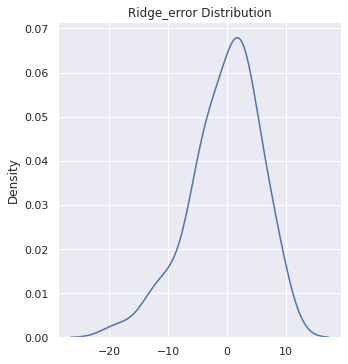

In [ ]:
import seaborn as sns
sns.displot(Abserror_ridge,kind="kde")
plt.title('Ridge_error Distribution')

In [ ]:
print(len(b0))

11


In [ ]:
b8

[1.6542399218055859e-09,
 2.4573449096353675e-09,
 2.797736071901419e-09,
 2.9806365862931556e-09,
 3.093604610448981e-09,
 3.169769939374855e-09,
 3.224318481836373e-09,
 3.265157755578996e-09,
 3.2967954632702537e-09,
 3.3219810507777637e-09,
 3.342481952134131e-09]

Text(0.5, 1.0, 'Ridge regression')

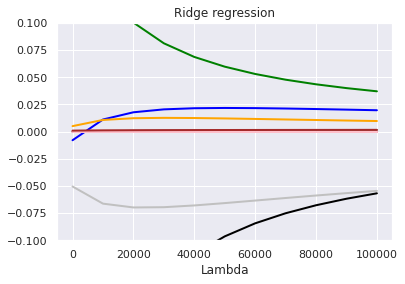

In [ ]:
#Beta vs lambda
df=pd.DataFrame(list(zip(Lambda,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11)),columns =['Lambda','Beta1','Beta2','Beta3','Beta4','Beta5','Beta6','Beta7','Beta8','Beta9','Beta10','Beta11']) 
plt.ylim(-0.1,0.1)
df
plt.plot( 'Lambda','Beta1', data=df, marker='', color='black', linewidth=2)
plt.plot( 'Lambda','Beta2', data=df, marker='', color='blue', linewidth=2)
plt.plot( 'Lambda','Beta3', data=df, marker='', color='red', linewidth=2,)
plt.plot( 'Lambda','Beta4', data=df, marker='', color='green', linewidth=2)
plt.plot( 'Lambda','Beta5', data=df, marker='', color='yellow', linewidth=2)
plt.plot( 'Lambda','Beta6', data=df, marker='', color='grey', linewidth=2)
plt.plot( 'Lambda','Beta7', data=df, marker='', color='orange', linewidth=2)
plt.plot( 'Lambda','Beta8', data=df, marker='', color='violet', linewidth=2)
plt.plot( 'Lambda','Beta9', data=df, marker='', color='pink', linewidth=2)
plt.plot( 'Lambda','Beta10', data=df, marker='', color='brown', linewidth=2)
plt.plot( 'Lambda','Beta11', data=df, marker='', color='silver', linewidth=2)
plt.xlabel('Lambda')
plt.title('Ridge regression')
#plt.legend(loc="best")
#df.to_csv('Z.csv',index=True)

In [ ]:
Ridge_beta=df[df['Lambda']==10.0]
Ridge_beta.drop('Lambda',axis=1)
Ridge_beta.insert(loc=0, column='Beta0', value=b0[1])

In [ ]:
Ridge_beta

,Beta0,Lambda,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,Beta7,Beta8,Beta9,Beta10,Beta11


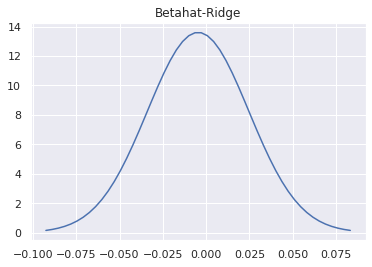

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics 
import scipy.stats as stats
import math
mu = np.mean(w)
variance = statistics.variance(w)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Betahat-Ridge')
plt.show()

In [ ]:
b1

### Regression line is y=b1x1+b2x2+b3x3+.......+b11x11+b0

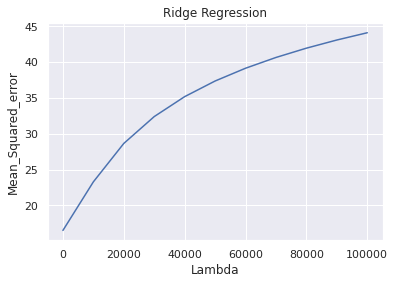

In [ ]:
Error
#Error vs Lambda graph(Comparison)
plt.plot(Lambda,Error)
plt.title('Ridge Regression')
plt.xlabel('Lambda')
plt.ylabel('Mean_Squared_error')
plt.show()

### Plotting

## Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
# split into train test sets
X=data.iloc[:,0:11].to_numpy()
y=data.iloc[:,11].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(186, 11) (62, 11) (186,) (62,)


In [ ]:
print(data.head(10))

   Birth Rate  Cancer Rate  ...  Stroke Rate  Life Expectancy
0        45.1       118.50  ...       154.41            59.82
1        11.5       126.75  ...       105.31            77.49
2        24.8        74.01  ...        74.66            74.42
3        23.5       109.11  ...        83.21            73.19
4        10.2       109.11  ...        83.21            73.19
5        40.9        82.46  ...       142.27            51.68
6        11.1       109.11  ...        83.21            73.19
7        13.8       119.09  ...        47.90            75.82
8        17.5        46.07  ...        78.00            73.19
9        18.7       134.15  ...        44.13            76.01

[10 rows x 12 columns]


In [ ]:
X

array([[4.510000e+01, 1.185000e+02, 1.023000e+04, ..., 6.528640e+05,
        3.750000e+01, 1.544100e+02],
       [1.150000e+01, 1.267500e+02, 1.023000e+04, ..., 2.874800e+04,
        1.111000e+02, 1.053100e+02],
       [2.480000e+01, 7.401000e+01, 1.023000e+04, ..., 2.381741e+06,
        1.510000e+01, 7.466000e+01],
       ...,
       [3.590000e+01, 6.945000e+01, 1.023000e+04, ..., 5.279680e+05,
        4.390000e+01, 1.643500e+02],
       [4.360000e+01, 1.121900e+02, 1.023000e+04, ..., 7.526180e+05,
        1.760000e+01, 6.418000e+01],
       [2.920000e+01, 1.171800e+02, 1.023000e+04, ..., 3.907570e+05,
        3.240000e+01, 6.338000e+01]])

In [ ]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train,Y_train)
print(lasso.coef_)
print(lasso.intercept_)

[-2.77802899e-01  1.18182277e-02 -1.62917057e-07  2.17792129e-02
  9.39751924e-07  5.03211857e-04  2.46487437e-03 -4.98484358e-09
 -3.26854677e-07  7.13987281e-04 -7.78289793e-02]
80.75678838445178


In [ ]:
from sklearn.linear_model import Ridge
lasso = Ridge(alpha=10)
lasso.fit(X_train,Y_train)
print(lasso.coef_)
print(lasso.intercept_)

ValueError: ignored

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
Lambda=[0.1,1,10,100,1000]
b1=[]
b2=[]
b3=[]
b4=[]
b5=[]
b6=[]
b7=[]
b8=[]
b9=[]
b10=[]
b11=[]
b0=[]
Error=[]
for i in Lambda:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,Y_train)
    w=ridge.coef_
    b1.append(w[0])
    b2.append(w[1])
    b3.append(w[2])
    b4.append(w[3])
    b5.append(w[4])
    b6.append(w[5])
    b7.append(w[6])
    b8.append(w[7])
    b9.append(w[8])
    b10.append(w[9])
    b11.append(w[10])
    b=ridge.intercept_
    b0.append(b)
    Y_pred=ridge.predict(X_test)
    Error.append(r2_score(Y_test,Y_pred))

In [ ]:
Error

[0.6504656102251465,
 0.6504545407467598,
 0.65034378014171,
 0.6492297604534683,
 0.6375916606763368]

In [ ]:
from sklearn import linear_model
Lambda=[0.1,1,10,100,1000]
b1=[]
b2=[]
b3=[]
b4=[]
b5=[]
b6=[]
b7=[]
b8=[]
b9=[]
b10=[]
b11=[]
b0=[]
Error=[]
for i in Lambda:
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(X_train,Y_train)
    w=lasso.coef_
    b1.append(w[0])
    b2.append(w[1])
    b3.append(w[2])
    b4.append(w[3])
    b5.append(w[4])
    b6.append(w[5])
    b7.append(w[6])
    b8.append(w[7])
    b9.append(w[8])
    b10.append(w[9])
    b11.append(w[10])
    b=lasso.intercept_
    b0.append(b)
    Y_pred=lasso.predict(X_test)
    Error.append(r2_score(Y_test,Y_pred))

In [ ]:
Error

[0.6498533114239653,
 0.6438539414278649,
 0.5327754020919633,
 -0.4031562032509861,
 -0.34638342136588984]

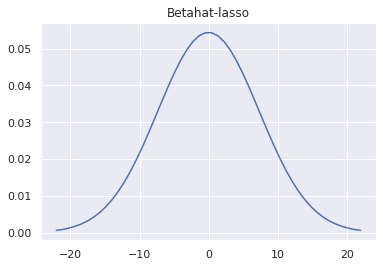

In [ ]:
from sklearn import linear_model
Lambda=10
lasso = linear_model.Lasso(alpha=Lambda)
lasso.fit(X_train,Y_train)
w_lasso=lasso.coef_
b=lasso.intercept_
Y_pred=lasso.predict(X_test)
Abserror_lasso=Y_test-Y_pred
square_lasso=Abserror**2
mean_square_Error_lasso=np.mean(square)

import matplotlib.pyplot as plt
import numpy as np
import statistics 
import scipy.stats as stats
import math
mu_lasso = np.mean(w_lasso)
variance_lasso = statistics.variance(w_lasso)
sigma_lasso = math.sqrt(variance)
x_lasso = np.linspace(mu_lasso - 3*sigma_lasso, mu_lasso + 3*sigma_lasso, 50)
plt.plot(x_lasso, stats.norm.pdf(x_lasso, mu_lasso, sigma_lasso))
plt.title('Betahat-lasso')
plt.show()

Text(0.5, 1.0, 'Lasso_error Distribution')

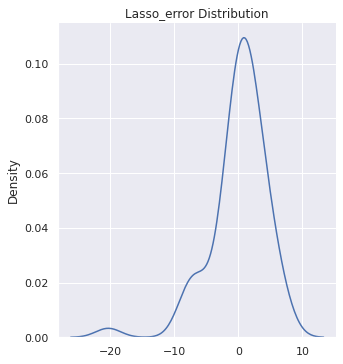

In [ ]:
import seaborn as sns
sns.displot(Abserror_lasso,kind="kde")
plt.title('Lasso_error Distribution')

In [ ]:
b1

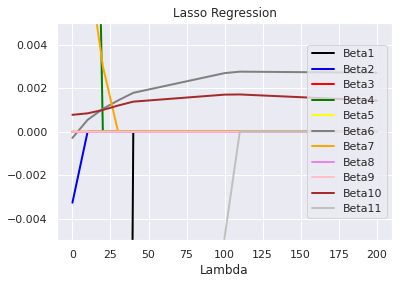

In [ ]:
#Betahat vs lambda
D=pd.DataFrame(list(zip(Lambda,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11)),columns =['Lambda','Beta1','Beta2','Beta3','Beta4','Beta5','Beta6','Beta7','Beta8','Beta9','Beta10','Beta11']) 

D
plt.ylim(-0.005,0.005)
plt.plot( 'Lambda','Beta1', data=D, marker='', color='black', linewidth=2)
plt.plot( 'Lambda','Beta2', data=D, marker='', color='blue', linewidth=2)
plt.plot( 'Lambda','Beta3', data=D, marker='', color='red', linewidth=2,)
plt.plot( 'Lambda','Beta4', data=D, marker='', color='green', linewidth=2)
plt.plot( 'Lambda','Beta5', data=D, marker='', color='yellow', linewidth=2)
plt.plot( 'Lambda','Beta6', data=D, marker='', color='grey', linewidth=2)
plt.plot( 'Lambda','Beta7', data=D, marker='', color='orange', linewidth=2)
plt.plot( 'Lambda','Beta8', data=D, marker='', color='violet', linewidth=2)
plt.plot( 'Lambda','Beta9', data=D, marker='', color='pink', linewidth=2)
plt.plot( 'Lambda','Beta10', data=D, marker='', color='brown', linewidth=2)
plt.plot( 'Lambda','Beta11', data=D, marker='', color='silver', linewidth=2)
plt.xlabel('Lambda')
#plt.ylim(-0.25,0.2)
plt.title('Lasso Regression')
plt.legend(loc="right")

In [ ]:
Lasso_beta=D[D['Lambda']==10.0]
Lasso_beta.drop('Lambda',axis=1)
Lasso_beta.insert(loc=0, column='Beta0', value=b0[3])

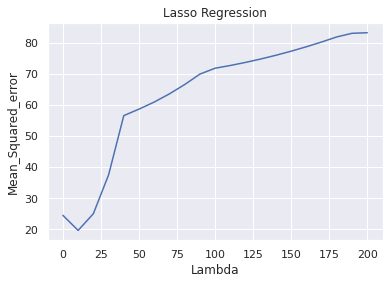

In [ ]:
#Error
#Error vs Lambda graph(Comparison)
plt.plot(Lambda,Error)
plt.title('Lasso Regression')
plt.xlabel('Lambda')
plt.ylabel('Mean_Squared_error')
plt.show()

In [ ]:
# Beta Estimation LS vs Ridge vs Lasso

In [ ]:
from sklearn import linear_model
Lambda=10
lasso = linear_model.Lasso(alpha=Lambda)
lasso.fit(X_train,Y_train)
w_lasso=lasso.coef_
b=lasso.intercept_
Lasso_Y_pred=lasso.predict(X_test)
x=[i for i in range(0,11)]
# w_lasso=list(w_lasso)
# w_lasso.insert(0,b)


In [ ]:
Lambda=10
I=np.identity(11)
numerator=np.dot(np.transpose(X_train),Y_train)
denominator=np.dot(X_trainT,X_train)+Lambda*I
inverse=np.linalg.inv(denominator)
w_ridge=np.dot(inverse,numerator) 
b=Y_train_mean-np.dot(np.transpose(w),X_train_mean)
Ridge_Y_pred=np.dot(X_test,np.transpose(w))+b
# w_ridge=list(w_ridge)
# w_ridge.insert(0,b)


In [ ]:
# LS_w.insert(0,Ls_b0)

In [ ]:
len(LS_w)

11

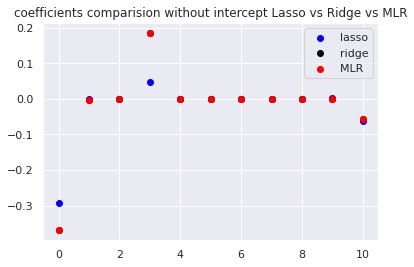

In [ ]:
plt.scatter(x,w_lasso,label='lasso',color='blue')
plt.scatter(x,w_ridge,label='ridge',color='black')
plt.scatter(x,LS_w,label='MLR ',color='red')
plt.legend()
plt.title('coefficients comparision without intercept Lasso vs Ridge vs MLR')
plt.show()

In [ ]:
new_x=[i for i in range(0,62)]

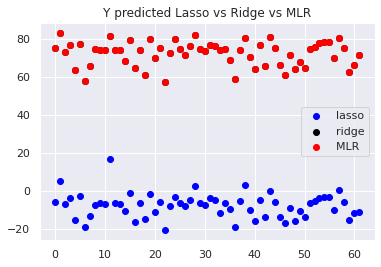

In [ ]:
plt.scatter(new_x,Lasso_Y_pred,label='lasso',color='blue')
plt.scatter(new_x,Ridge_Y_pred,label='ridge',color='black')
plt.scatter(new_x,LS_ypred,label='MLR ',color='red')
plt.legend()
plt.title('Y predicted Lasso vs Ridge vs MLR')
plt.show()